In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pypfopt as pf

In [2]:
from modules.Colher_tratar_dados.load_data import load_data

# Dados de Entrada
data_simulacao = datetime(2021,6,10)

[dict_df_acoes, df_Selic, df_Expectativa_Selic_mensal]\
      = load_data(data_simulacao)

In [3]:
from example.Estrategia_retorno import main_ret
info_main, info_verificao = main_ret(dict_df_acoes, df_Selic, df_Expectativa_Selic_mensal)
expec_retorno = info_main[0]
cotacoes = info_main[1]
setores = info_main[2]


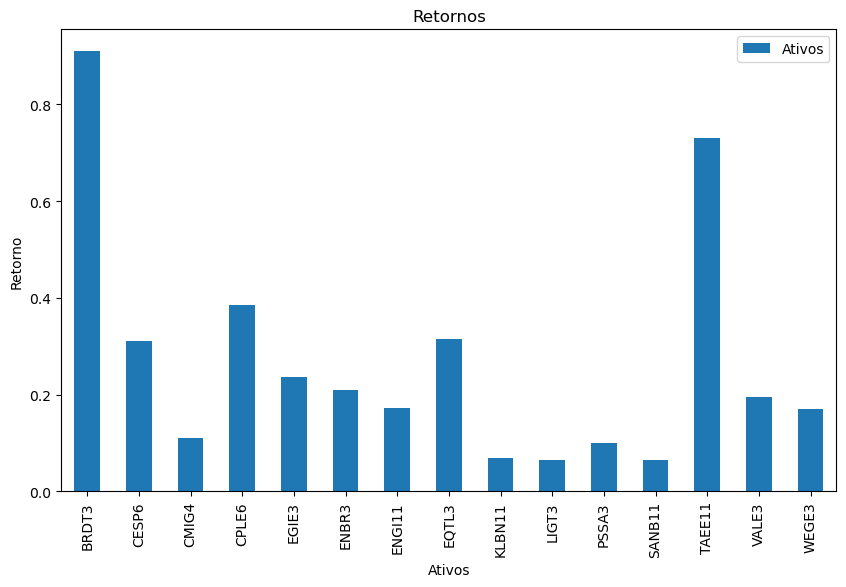

In [4]:
# Suponha que você tenha uma série chamada 'expec_retorno'
# Crie um DataFrame a partir da série para facilitar a plotagem
df = pd.DataFrame({'Ativos': expec_retorno})

# Crie um gráfico de barras
ax = df.plot(kind='bar', figsize=(10, 6), title='Retornos')

# Adicione rótulos aos eixos
ax.set_xlabel('Ativos')
ax.set_ylabel('Retorno')

# Exiba o gráfico
plt.show()

## Calculating the covariance matrix

<Axes: >

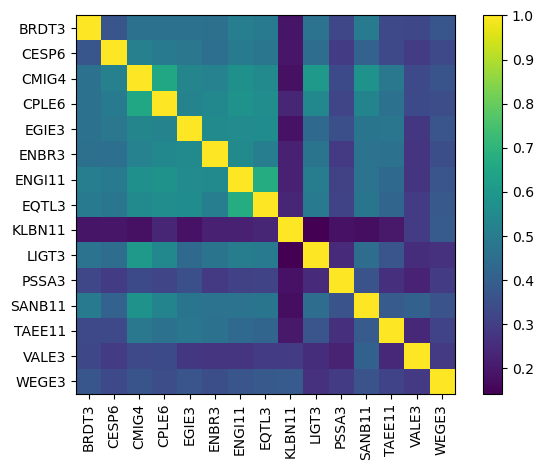

In [5]:
from pypfopt import risk_models, plotting, EfficientFrontier, objective_functions

S = risk_models.CovarianceShrinkage(cotacoes).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True)

## Restrição por setores



In [6]:
unique_sectors = list(set(setores))  # Obtém os valores únicos usando set()
setores_dic = setores.to_dict()
# Criar 'sector_lower' com 0.1 para todos os setores únicos
sector_lower = {setor: 0.05 for setor in unique_sectors}

# Criar 'sector_upper' com 0.4 para todos os setores únicos
sector_upper = {setor: 0.4 for setor in unique_sectors}

In [7]:
mu = expec_retorno
S = risk_models.CovarianceShrinkage(cotacoes).ledoit_wolf()

ef = EfficientFrontier(mu, S, weight_bounds=(0, 0.1))  # weight_bounds automatically set to (0, 1)
ef.add_sector_constraints(setores_dic, sector_lower, sector_upper)

# ITUB4 valor igual ou de 10% de peso na carteira
index = ef.tickers.index("EQTL3")
ef.add_constraint(lambda w: w[index] >= 0.05)

ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamma is the tuning parameter

ef.max_sharpe()
weights = ef.clean_weights()
weights


OrderedDict([('BRDT3', 0.1),
             ('CESP6', 0.09391),
             ('CMIG4', 0.0),
             ('CPLE6', 0.07717),
             ('EGIE3', 0.03555),
             ('ENBR3', 0.0),
             ('ENGI11', 0.0),
             ('EQTL3', 0.09337),
             ('KLBN11', 0.1),
             ('LIGT3', 0.0),
             ('PSSA3', 0.1),
             ('SANB11', 0.1),
             ('TAEE11', 0.1),
             ('VALE3', 0.1),
             ('WEGE3', 0.1)])

In [8]:
ef.portfolio_performance(verbose=True);

Expected annual return: 32.1%
Annual volatility: 21.8%
Sharpe Ratio: 1.38


## Apresentação dos resultados

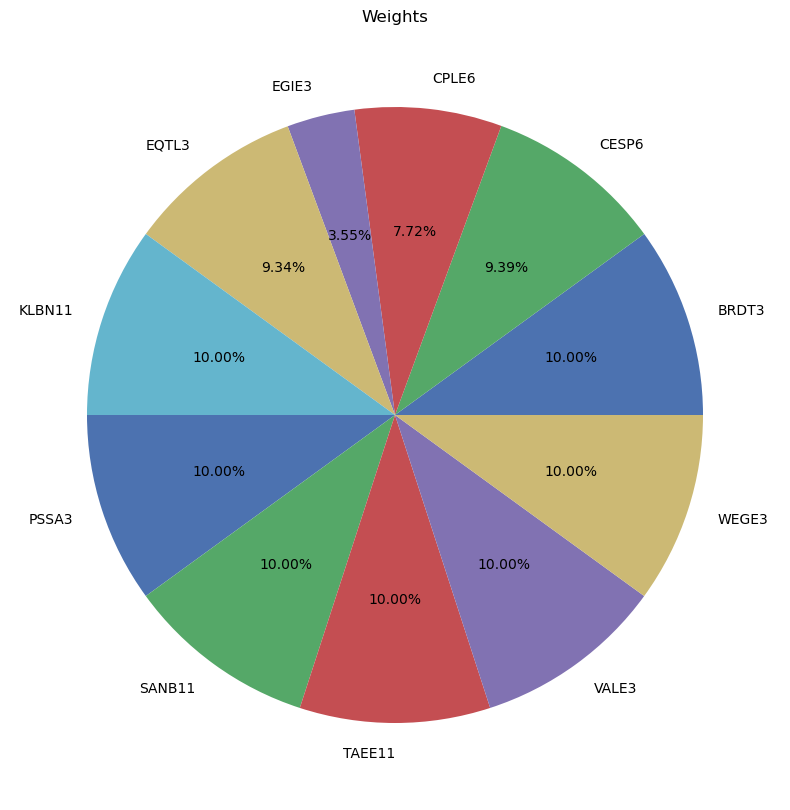

In [9]:
from collections import OrderedDict
# Crie um novo OrderedDict excluindo os itens com valores nulos
weights_sem_nulos = OrderedDict((chave, valor) for chave, valor in weights.items() if valor != 0.0)
pd.Series(weights_sem_nulos).plot.pie(figsize=(10,10), title='Weights', autopct='%.2f%%');

In [10]:
info_verificao[0]

,Setor,Retorno_anual_esperado,ROE,Multiplo_Divida,DY_medio,CAGR_Medio,Expansao_Multiplo,Multiplo_atual,Multiplo_medio,Desvio_multiplo
B3SA3,Bancos e Serviços Financeiros,0.044811,0.179345,-1.210714,0.033238,0.334251,1,22.316111,34.664592,-0.276809
BBAS3,Bancos e Serviços Financeiros,0.02143,0.105667,-10.303106,0.050482,-0.006754,1,7.513555,7.274162,0.091573
BBDC3,Bancos e Serviços Financeiros,0.026296,0.138478,-19.236822,0.038791,0.015604,0.988295,12.337198,11.135195,0.568271
BBDC4,Bancos e Serviços Financeiros,0.021612,0.138478,-19.236822,0.036516,0.015604,0.905125,14.380626,11.716092,1.024689
BBSE3,Bancos e Serviços Financeiros,0.026077,0.550633,-0.841595,0.087786,-0.035751,1,12.500789,13.973781,-0.423008
BPAC11,Bancos e Serviços Financeiros,0.015815,0.164072,-0.455206,0.010258,0.042828,1,22.56375,22.586899,-0.002994
BRDT3,"Biocombustíveis, Gás e Petróleo",0.909434,0.327795,1.089263,0.051482,0.269296,1.430672,6.795994,13.143348,-1.855676
CESP6,Energia e Serviços Básicos,0.310219,0.253986,0.729509,0.073736,0.220243,1,6.656471,12.44161,-0.436744
CIEL3,Bancos e Serviços Financeiros,0.0,0.059354,0.022981,0.11782,-0.181402,0.924917,19.703656,15.497635,0.771292
CMIG4,Energia e Serviços Básicos,0.110215,0.205603,1.323639,0.038958,0.068585,1,5.093172,6.9341,-0.943598
